In [1]:
import pandas as pd 
import numpy as np
from datetime import timedelta
import missingno as msno
from scipy import stats
import statistics
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r'../input/covid19-case-surveillance-public-use-dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv')


In [3]:
df.head(3)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No


In [4]:
df.tail(3)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405078,2020/11/03,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing


In [5]:
print("The number of columns present in a dataset are:",df.shape[1])
print("The number of rows present in a dataset are:",df.shape[0])

The number of columns present in a dataset are: 11
The number of rows present in a dataset are: 8405079


In [6]:
df.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
       'death_yn', 'medcond_yn'],
      dtype='object')

# Column Description

1.cdc_report_dt - earlier clinical dates related to illness or specimen collection

2.pos_spec_dt   - date at which column name was submitted to the database

3.onset_dt      - date of the symptoms shown

4.sex           - gender of a person

5.age_group     - various age groups of a person

6.Race and ethnicity - social group or clutural tradition of a person

7.hosp_yn       - status of admission in hospitial 

8.icu_yn        - status of admission in ICU

9.death_yn      - did the patient died as a result of this illness

10.medcond_yn   - status of pre-existing medical condition

In [7]:
#data type of various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   cdc_report_dt                  object
 1   pos_spec_dt                    object
 2   onset_dt                       object
 3   current_status                 object
 4   sex                            object
 5   age_group                      object
 6   Race and ethnicity (combined)  object
 7   hosp_yn                        object
 8   icu_yn                         object
 9   death_yn                       object
 10  medcond_yn                     object
dtypes: object(11)
memory usage: 705.4+ MB


In [8]:
#Changing object to datetime 
df['cdc_report_dt']=pd.to_datetime(df['cdc_report_dt'])

df['onset_dt']=pd.to_datetime(df.onset_dt)
df['pos_spec_dt']=pd.to_datetime(df.pos_spec_dt)


In [9]:
#checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 11 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   cdc_report_dt                  datetime64[ns]
 1   pos_spec_dt                    datetime64[ns]
 2   onset_dt                       datetime64[ns]
 3   current_status                 object        
 4   sex                            object        
 5   age_group                      object        
 6   Race and ethnicity (combined)  object        
 7   hosp_yn                        object        
 8   icu_yn                         object        
 9   death_yn                       object        
 10  medcond_yn                     object        
dtypes: datetime64[ns](3), object(8)
memory usage: 705.4+ MB


In [10]:
#After changing the columns datatype let's check for missing in the dataset
df.isnull().sum()

cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64

In [11]:
#Percentage of missing values in each columns would be considered better for understanding

def percentage_of_missing():
    t=df.columns 
    for i in t:
        t=(df[i].isnull().sum())/df.shape[0]
        print(i[:4],'\t\t',round(t*100,4),'%')
percentage_of_missing()

cdc_ 		 0.0 %
pos_ 		 65.8446 %
onse 		 47.6988 %
curr 		 0.0 %
sex 		 0.0002 %
age_ 		 0.0011 %
Race 		 0.0001 %
hosp 		 0.0 %
icu_ 		 0.0 %
deat 		 0.0 %
medc 		 0.0 %


<AxesSubplot:>

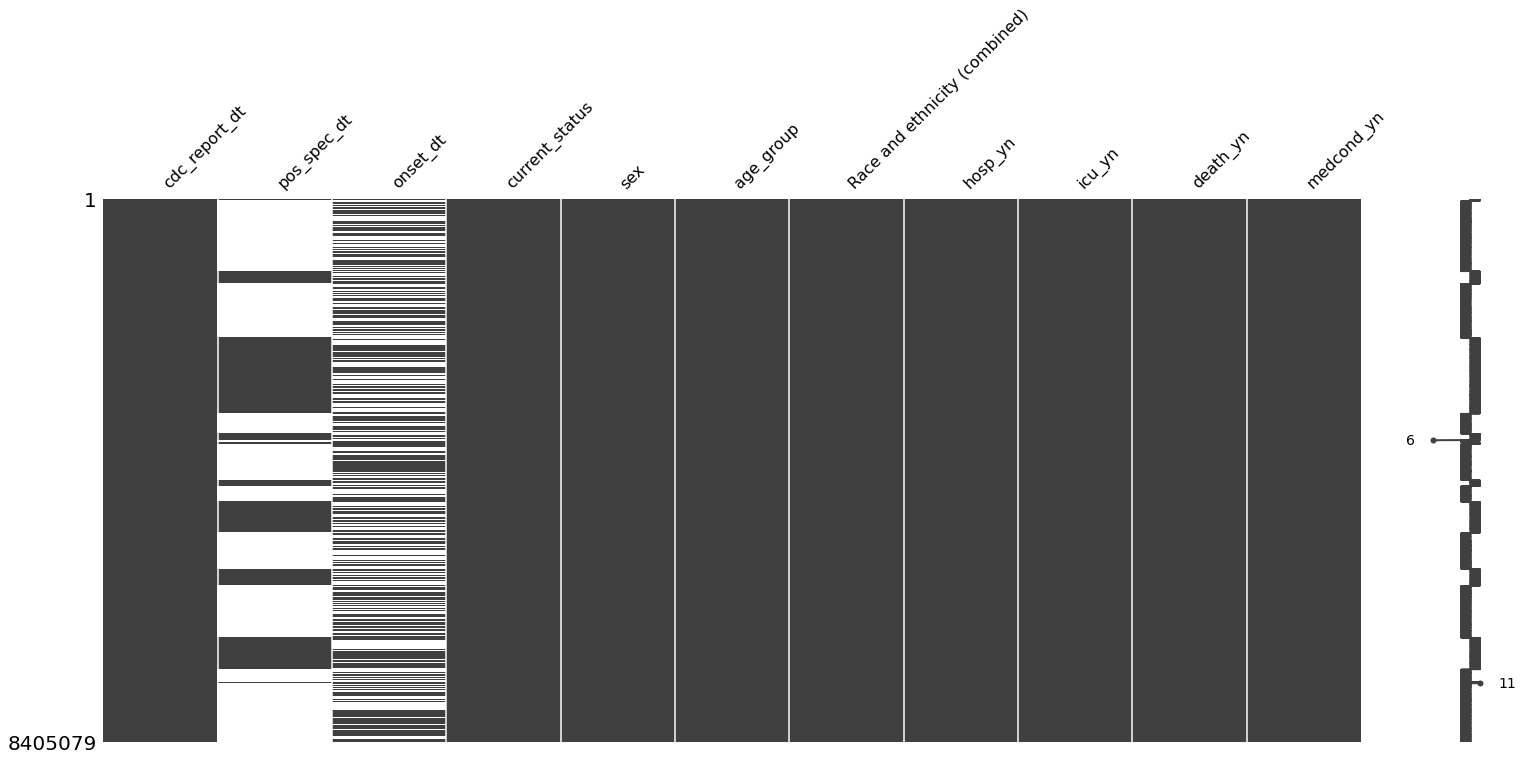

In [12]:
msno.matrix(df)


<AxesSubplot:>

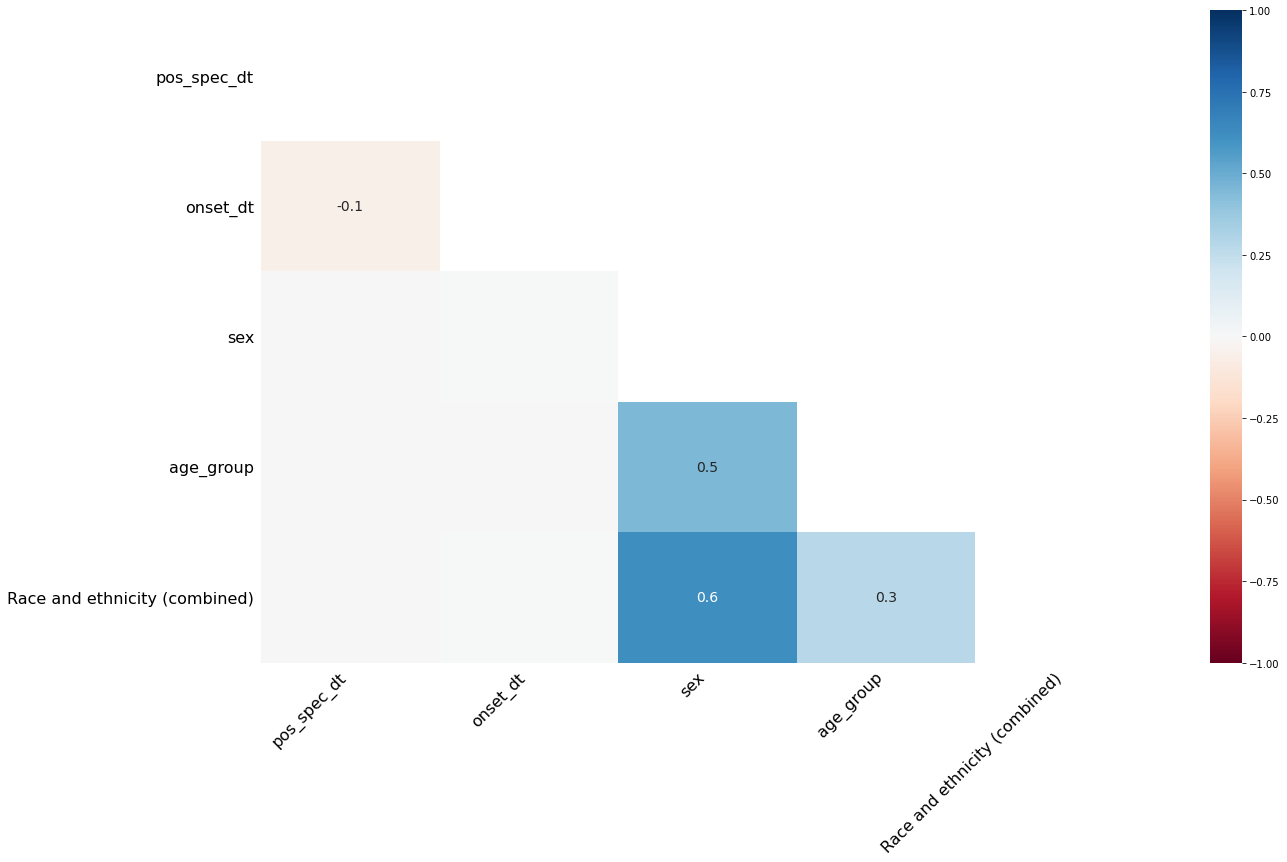

In [13]:
#Heatmap with msno helps to know how strongly the presence or absence of one variable affects the presence of another
msno.heatmap(df)

<AxesSubplot:>

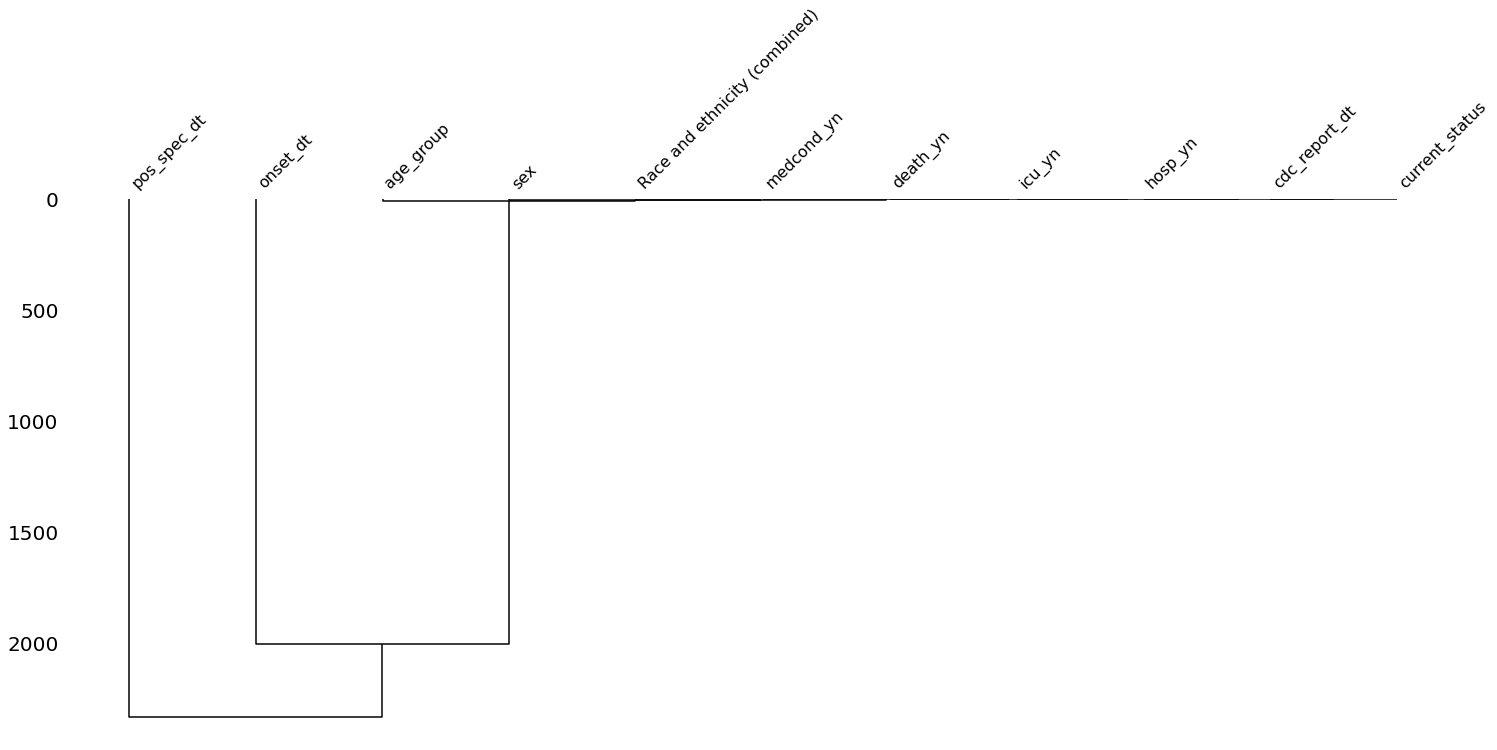

In [14]:
 msno.dendrogram(df)

 # DataPreprocessing

In [15]:

#Instead of deleting the columns pos_spec_dt and onset_pos_difference we will try to fill the missing values by taking the difference between them.
df['onset_pos_difference'] = (df['onset_dt'] -df['pos_spec_dt'][df.pos_spec_dt.notnull()]).dt.days
df['pos_difference'] = (df['cdc_report_dt'] -df['pos_spec_dt'][df.pos_spec_dt.notnull()]).dt.days
df['onset_difference'] = (df['cdc_report_dt'] -df['onset_dt'][df.onset_dt.notnull()]).dt.days

In [16]:
print('on_pos_set:-',df['onset_pos_difference'].mean(),df['onset_pos_difference'].median(),df['onset_pos_difference'].mode())

print('onset_set:-',df['onset_difference'].mean(),df['onset_difference'].median(),df['onset_difference'].mode())

print('pos_difference:-',df['pos_difference'].mean(),df['pos_difference'].mode(),df['pos_difference'].median())


on_pos_set:- -2.7329561721383886 -2.0 0    0.0
dtype: float64
onset_set:- 14.321092995222656 8.0 0    0.0
dtype: float64
pos_difference:- 3.6323136252786257 0    0.0
dtype: float64 2.0


In [17]:
df['onset_dt'].fillna(df.cdc_report_dt + timedelta(days=2), inplace = True)

df['pos_spec_dt'].fillna(df.cdc_report_dt+timedelta(days=2),inplace=True)

In [18]:
#Extracting month 
df['month_cdc']=df['cdc_report_dt'].dt.month
#Extracting week
df['week_cdc']=df['cdc_report_dt'].dt.week

In [19]:
df.drop(columns=['onset_pos_difference','onset_difference','pos_difference'],inplace=True)

In [20]:
df.isnull().sum()

cdc_report_dt                     0
pos_spec_dt                       0
onset_dt                          0
current_status                    0
sex                              18
age_group                        89
Race and ethnicity (combined)     7
hosp_yn                           0
icu_yn                            0
death_yn                          0
medcond_yn                        0
month_cdc                         0
week_cdc                          0
dtype: int64

In [21]:
df.sex.unique()

array(['Male', 'Unknown', 'Missing', 'Female', 'Other', nan], dtype=object)

In [22]:
df['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      73845
Missing      19520
Other          207
Name: sex, dtype: int64

In [23]:
df[df['age_group'].isna()][:29]

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month_cdc,week_cdc
3736390,2020-11-01,2020-11-03,2020-11-03,Laboratory-confirmed case,Missing,NaN,"Asian, Non-Hispanic",No,Unknown,No,Missing,11,44
3736391,2020-09-21,2020-09-23,2020-09-13,Laboratory-confirmed case,Missing,NaN,"Asian, Non-Hispanic",No,Missing,No,Missing,9,39
3736392,2020-11-07,2020-11-09,2020-10-31,Laboratory-confirmed case,Missing,NaN,"Asian, Non-Hispanic",No,Missing,Missing,Missing,11,45
3736393,2020-07-02,2020-07-04,2020-07-04,Laboratory-confirmed case,Missing,NaN,"Asian, Non-Hispanic",No,Missing,No,Missing,7,27
3736394,2020-08-29,2020-08-31,2020-08-27,Laboratory-confirmed case,Other,NaN,"Black, Non-Hispanic",Yes,No,No,Missing,8,35
3736395,2020-11-09,2020-11-11,2020-11-04,Laboratory-confirmed case,Other,NaN,"Multiple/Other, Non-Hispanic",No,Missing,No,Missing,11,46
3736396,2020-10-15,2020-10-17,2020-10-15,Laboratory-confirmed case,Other,NaN,"Multiple/Other, Non-Hispanic",No,No,No,Yes,10,42
3736397,2020-11-19,2020-11-21,2020-11-10,Laboratory-confirmed case,Other,NaN,"Multiple/Other, Non-Hispanic",No,Missing,No,Missing,11,47
3736398,2020-08-21,2020-08-23,2020-08-23,Laboratory-confirmed case,Unknown,NaN,"Native Hawaiian/Other Pacific Islander, Non-Hi...",Missing,Missing,Missing,Missing,8,34
3736399,2020-06-24,2020-06-26,2020-06-01,Laboratory-confirmed case,Unknown,NaN,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,Unknown,Unknown,Missing,6,26


In [24]:
df['sex']=df.groupby(['death_yn','icu_yn','month_cdc']).sex.transform(lambda x: x.fillna(x.mode()[0]))

In [25]:
df['sex'].unique()

array(['Male', 'Unknown', 'Missing', 'Female', 'Other'], dtype=object)

In [26]:
df['sex'].value_counts()

Female     4340916
Male       3970591
Unknown      73845
Missing      19520
Other          207
Name: sex, dtype: int64

In [27]:
df['sex'].replace({'Missing':np.nan,'Unknown':np.nan},inplace=True)

In [28]:
df['sex']=df.groupby(['death_yn','icu_yn','month_cdc']).sex.transform(lambda x: x.fillna(x.mode()[0]))

df['sex'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [29]:
#filling missing values in Race and ethnicity
df['Race and ethnicity (combined)'].unique()

array(['Black, Non-Hispanic', 'White, Non-Hispanic', 'Unknown',
       'Asian, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic',
       'Multiple/Other, Non-Hispanic', 'Missing',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'Hispanic/Latino', nan], dtype=object)

# Apart from missing values there were Unkown, missing separately
How many missing values are present ..?

How many Unkown values are present...?


In [30]:
df['Race and ethnicity (combined)'].value_counts()

Unknown                                                 2781176
White, Non-Hispanic                                     2599410
Hispanic/Latino                                         1195739
Black, Non-Hispanic                                      736584
Missing                                                  601519
Multiple/Other, Non-Hispanic                             270509
Asian, Non-Hispanic                                      143080
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17213
Name: Race and ethnicity (combined), dtype: int64

In [31]:
#Replacing unkowns and missing to nan and then trying to fill the values 
df["Race and ethnicity (combined)"].replace({"Missing": np.nan, "Unknown": np.nan}, inplace=True)

In [32]:
df['Race and ethnicity (combined)'].unique()

array(['Black, Non-Hispanic', 'White, Non-Hispanic', nan,
       'Asian, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic',
       'Multiple/Other, Non-Hispanic',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'Hispanic/Latino'], dtype=object)

In [33]:
df['Race and ethnicity (combined)']=df.groupby(['death_yn','icu_yn','month_cdc'])['Race and ethnicity (combined)'].transform(lambda x: x.fillna(x.mode()[0]))

In [34]:

df['Race and ethnicity (combined)'].unique()

array(['Black, Non-Hispanic', 'White, Non-Hispanic',
       'Asian, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic',
       'Multiple/Other, Non-Hispanic',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'Hispanic/Latino'], dtype=object)

In [35]:
#Missing values in age_group column

df['age_group'].unique()

array(['10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
       '50 - 59 Years', '0 - 9 Years', '60 - 69 Years', '80+ Years',
       '70 - 79 Years', nan, 'Unknown'], dtype=object)

In [36]:
df['age_group'].replace({'Unknown':np.nan},inplace=True)

In [37]:
df['age_group'].unique()

array(['10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
       '50 - 59 Years', '0 - 9 Years', '60 - 69 Years', '80+ Years',
       '70 - 79 Years', nan], dtype=object)

In [38]:
df['age_group']=df.groupby(['death_yn','icu_yn','month_cdc','Race and ethnicity (combined)'])['age_group'].transform(lambda x: x.fillna(x.mode()[0]))

In [39]:
df['age_group'].unique()

array(['10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
       '50 - 59 Years', '0 - 9 Years', '60 - 69 Years', '80+ Years',
       '70 - 79 Years'], dtype=object)

In [40]:
#checking in other columns  for missing and Unkown data

df['hosp_yn'].unique()

array(['No', 'Missing', 'Unknown', 'Yes'], dtype=object)

In [41]:
df['hosp_yn'].replace({'Missing':np.nan,'Unknown':np.nan},inplace=True)
df['hosp_yn'].unique()


array(['No', nan, 'Yes'], dtype=object)

In [42]:
df['hosp_yn']=df.groupby(['death_yn','Race and ethnicity (combined)'])['hosp_yn'].transform(lambda x: x.fillna(x.mode()[0]))
df['hosp_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
df['hosp_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
#Checking icu_yn
df['icu_yn'].unique()

array(['Unknown', 'No', 'Missing', 'Yes'], dtype=object)

In [45]:
df['icu_yn'].replace({'Missing':np.nan,'Unknown':np.nan},inplace=True)

In [46]:
df['icu_yn']=df.groupby(['age_group','Race and ethnicity (combined)'])['icu_yn'].transform(lambda x: x.fillna(x.mode()[0]))

In [47]:
df['icu_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
#death column
df['death_yn'].unique()

array(['No', 'Missing', 'Unknown', 'Yes'], dtype=object)

In [49]:
df['death_yn'].replace({'Missing':np.nan,'Unknown':np.nan},inplace=True)

In [50]:
df['death_yn'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [51]:
df['death_yn']=df.groupby(['age_group','icu_yn','Race and ethnicity (combined)'])['death_yn'].transform(lambda x: x.fillna(x.mode()[0]))

In [52]:
df['death_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [53]:
#medcond_yn column
df['medcond_yn'].unique()

array(['No', 'Missing', 'Yes', 'Unknown'], dtype=object)

In [54]:
df['medcond_yn'].replace({'Missing':np.nan},inplace=True)

In [55]:
df['medcond_yn']=df.groupby(['icu_yn','Race and ethnicity (combined)'])['medcond_yn'].transform(lambda x: x.fillna(x.mode()[0]))


In [56]:
df['medcond_yn'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [57]:
#checking current status column
df['current_status'].unique()

array(['Laboratory-confirmed case', 'Probable Case'], dtype=object)

In [58]:
df.isnull().sum()

cdc_report_dt                    0
pos_spec_dt                      0
onset_dt                         0
current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
month_cdc                        0
week_cdc                         0
dtype: int64

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
month_cdc,8405079.0,8.180179,2.303354,1.0,6.0,8.0,10.0,11.0
week_cdc,8405079.0,34.201397,9.923094,1.0,27.0,35.0,43.0,47.0


In [60]:
df['death_yn'].unique()

array(['No', 'Yes'], dtype=object)

In [61]:
df['death_yn'].replace({'Yes':1,'No':0},inplace=True)

# DataVisualization 

# How to know the values distribution of age group ?

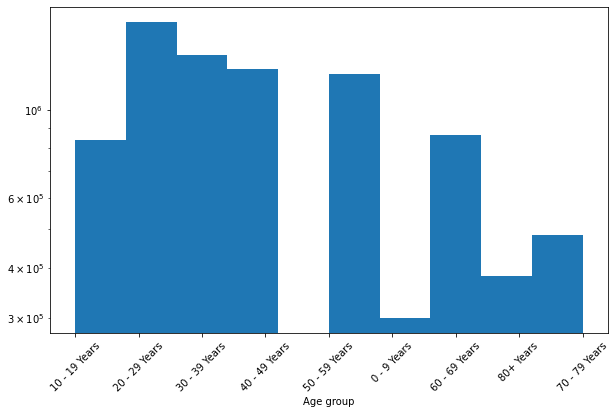

In [62]:
plt.figure(figsize=(10,6))
plt.hist(df['age_group'],log=True)
plt.xlabel("Age group")
plt.xticks(rotation=45)
plt.show()

# How to know the values distribution of Race and ethnicity..?

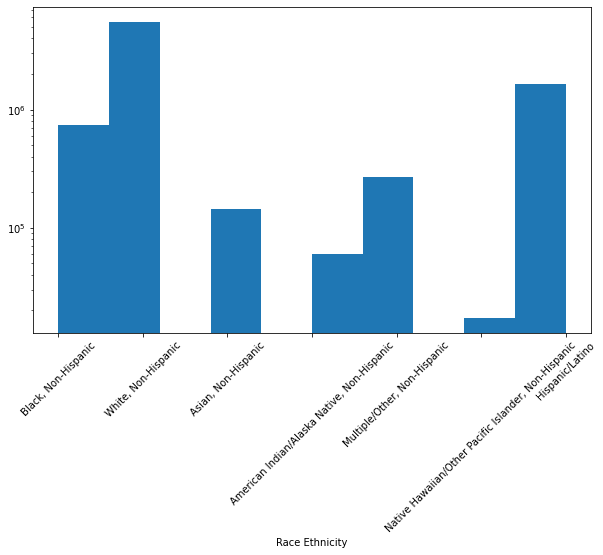

In [63]:
plt.figure(figsize=(10,6))
plt.hist(df['Race and ethnicity (combined)'],log=True)
plt.xlabel("Race Ethnicity")
plt.xticks(rotation=45)
plt.show()

# How to know the values distribution in Medical condition..?

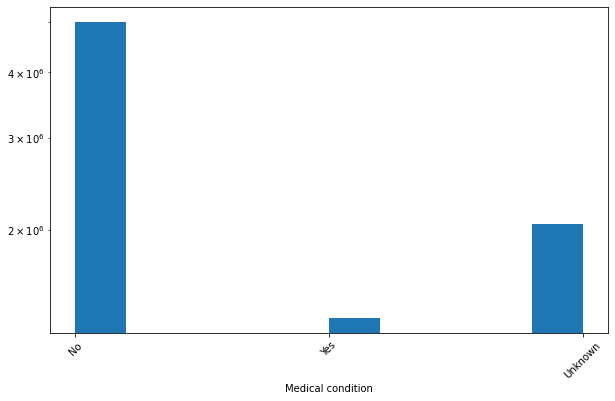

In [64]:
plt.figure(figsize=(10,6))
plt.hist(df['medcond_yn'],log=True)
plt.xlabel("Medical condition")
plt.xticks(rotation=45)
plt.show()

# Spread of admission based on gender in ICU..?


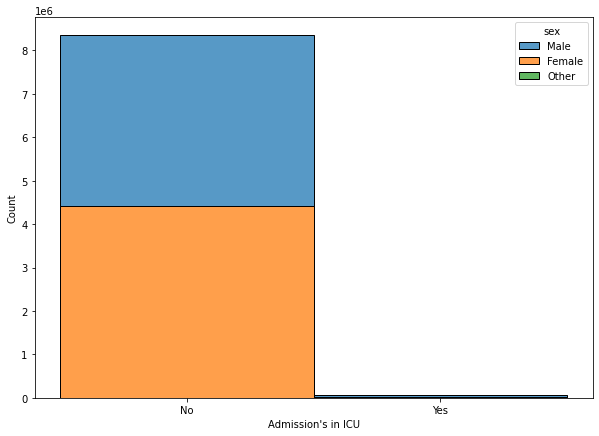

In [65]:

plt.figure(figsize=(10,7))
sns.histplot(data=df, x="icu_yn", hue="sex", multiple="stack")
plt.xlabel("Admission's in ICU")
plt.show()

# How to know the current status of people based on age group..?

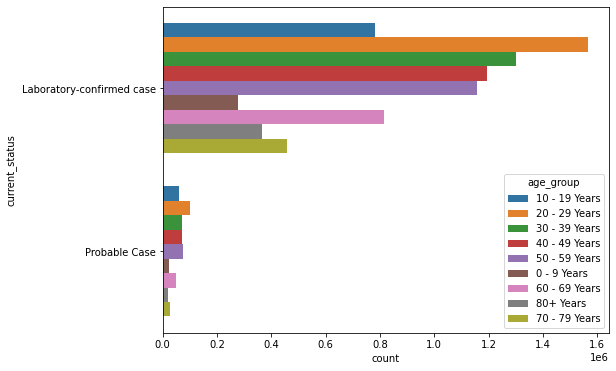

In [66]:
plt.figure(figsize=(8,6))
sns.countplot(y="current_status",hue ='age_group',data=df)
plt.show()

# How to know the death of people based on age group..?


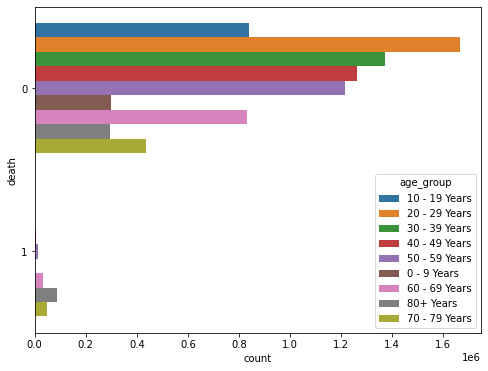

In [67]:

plt.figure(figsize=(8,6))
sns.countplot(y='death_yn',hue='age_group',data=df)
plt.ylabel('death')
plt.show()

# How to know to count of people joined in icu based on age group..?

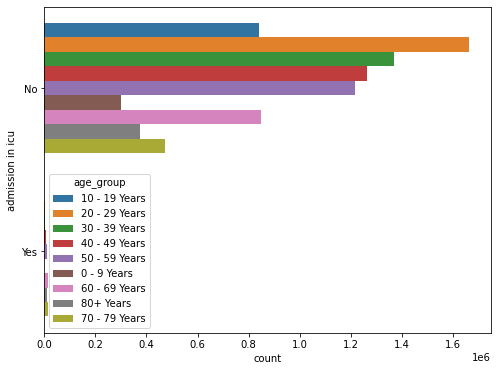

In [68]:

plt.figure(figsize=(8,6))
sns.countplot(y='icu_yn',hue='age_group',data=df)
plt.ylabel('admission in icu')
plt.show()

# How to know the death of people based on race and ethnicity..?

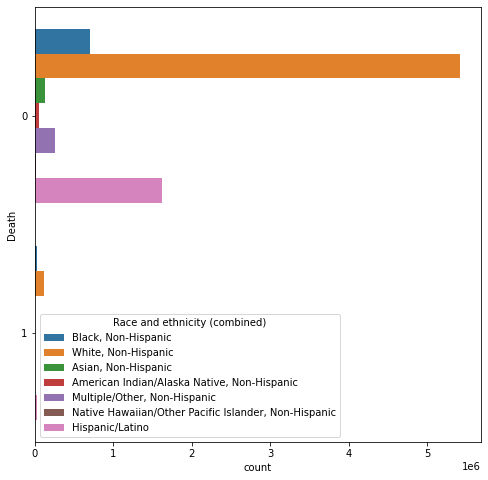

In [69]:
plt.figure(figsize=(8,8))
sns.countplot(y='death_yn',hue='Race and ethnicity (combined)',data=df)
plt.ylabel('Death')
plt.show()

# How to know the count of people based on age group and gender..?


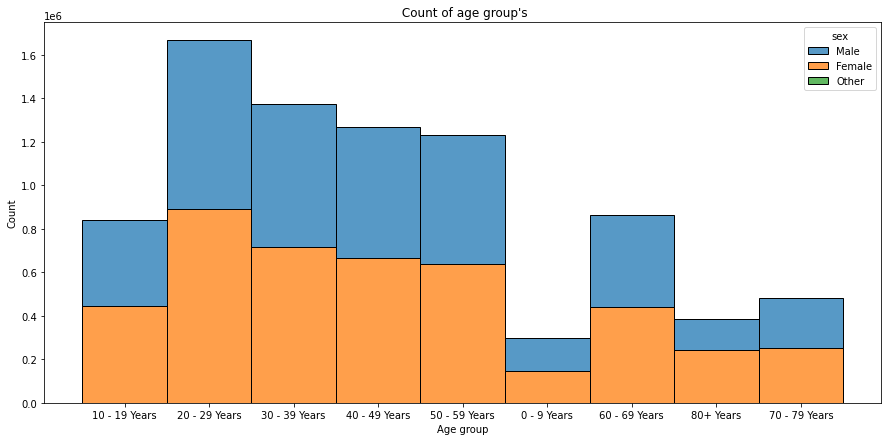

In [70]:
plt.figure(figsize=(15,7))
sns.histplot(data=df,x='age_group',bins=30,hue='sex',multiple='stack')
plt.xlabel("Age group")
plt.title(" Count of age group's")
plt.show()

# How to figureout the  count of people joined in icu based on age groups..?

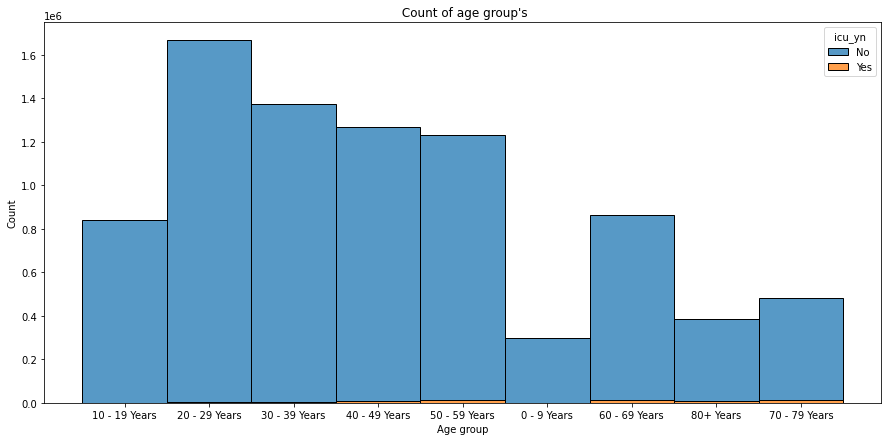

In [71]:
plt.figure(figsize=(15,7))
sns.histplot(data=df,x='age_group',bins=30,hue='icu_yn',multiple='stack')
plt.xlabel("Age group")
plt.title(" Count of age group's")
plt.show()

In [72]:
df['death_yn'].unique()

array([0, 1])

In [73]:
values = df['death_yn'].value_counts().tolist()
names = [ 'Yes', 'No']
fig = px.pie(names=names,values=values, title="Distribution Pre-Existing Medical Conditions",)
fig.show()


In [74]:
values = df['medcond_yn'].value_counts().tolist()
names = [ 'Unknown', 'Yes', 'No']
fig = px.pie(names=names,values=values, title="Distribution Pre-Existing Medical Conditions",)
fig.show()


In [75]:
values = df['current_status'].value_counts().tolist()
names = ['Confirmed', 'Probable']
px.pie( names=names,    values=values,title="Case Status Distribution")



In [76]:
df.corr()

,death_yn,month_cdc,week_cdc
death_yn,1.000000,-0.115225,-0.115871
month_cdc,-0.115225,1.000000,0.992436
week_cdc,-0.115871,0.992436,1.000000


<Figure size 720x720 with 0 Axes>

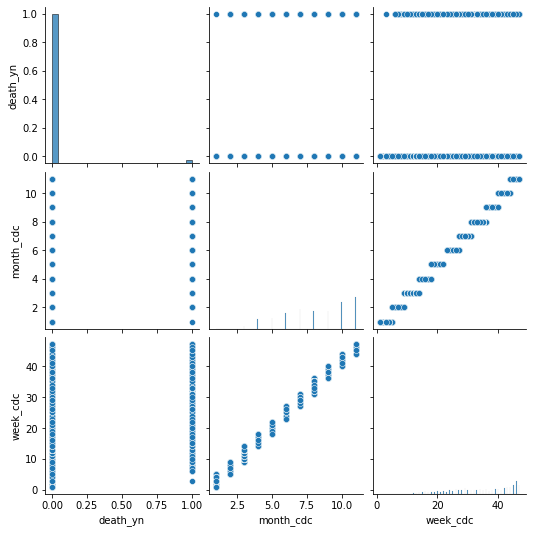

In [77]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

In [78]:
#df['year']
df['cdc_report_dt'].dt.year.max(),df['cdc_report_dt'].dt.year.min()#as the year is same so not considering year column

(2020, 2020)

In [79]:
data=df.groupby(["week_cdc",'death_yn']).count()
data.reset_index(inplace=True)

# How to know the trend of deaths based on weeks of a year..?

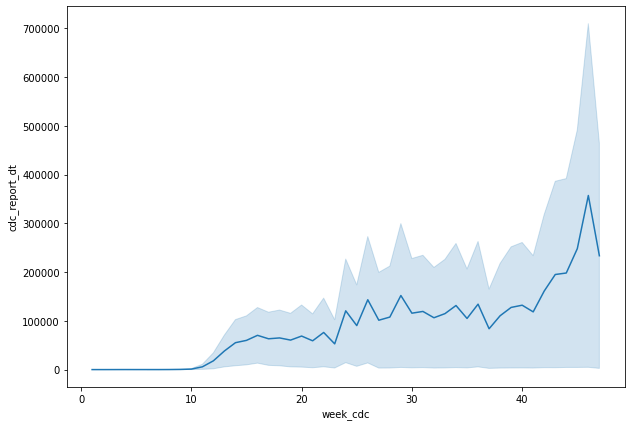

In [80]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data,x='week_cdc',y='cdc_report_dt')
plt.show()

#  How to know the trend of deaths based on weeks of a year , age group , admissions in icu and death of a person..?

In [81]:
data=df.groupby(["week_cdc",'age_group','icu_yn','death_yn']).count()
data.reset_index(inplace=True)

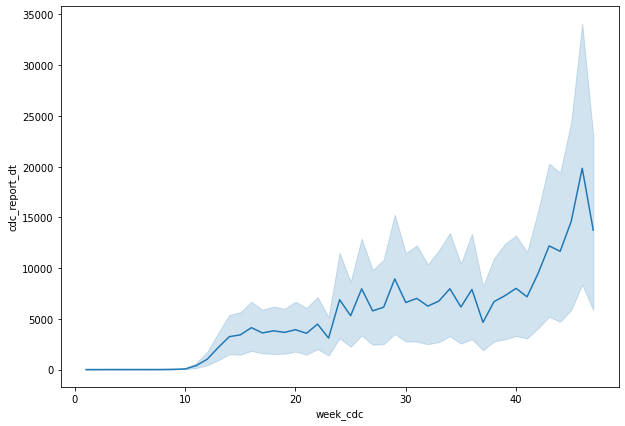

In [82]:
plt.figure(figsize=(10,7))
sns.lineplot(data=data,x='week_cdc',y='cdc_report_dt')
plt.show()

In [83]:
df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month_cdc,week_cdc
0,2020-11-10,2020-11-10,2020-11-12,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,0,No,11,46
1,2020-11-14,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,0,No,11,46
2,2020-11-19,2020-11-10,2020-11-09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,0,No,11,47
3,2020-11-14,2020-11-10,2020-11-16,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,0,Yes,11,46
4,2020-11-13,2020-11-10,2020-11-10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,0,Yes,11,46


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 13 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   cdc_report_dt                  datetime64[ns]
 1   pos_spec_dt                    datetime64[ns]
 2   onset_dt                       datetime64[ns]
 3   current_status                 object        
 4   sex                            object        
 5   age_group                      object        
 6   Race and ethnicity (combined)  object        
 7   hosp_yn                        object        
 8   icu_yn                         object        
 9   death_yn                       int64         
 10  medcond_yn                     object        
 11  month_cdc                      int64         
 12  week_cdc                       int64         
dtypes: datetime64[ns](3), int64(3), object(7)
memory usage: 833.6+ MB


In [85]:
df.current_status.unique()

array(['Laboratory-confirmed case', 'Probable Case'], dtype=object)

In [86]:
df.sex.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [87]:
df.age_group.unique()

array(['10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
       '50 - 59 Years', '0 - 9 Years', '60 - 69 Years', '80+ Years',
       '70 - 79 Years'], dtype=object)

In [88]:
df['Race and ethnicity (combined)'].unique()

array(['Black, Non-Hispanic', 'White, Non-Hispanic',
       'Asian, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic',
       'Multiple/Other, Non-Hispanic',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'Hispanic/Latino'], dtype=object)

In [89]:
df.hosp_yn.unique()

array(['No', 'Yes'], dtype=object)

In [90]:
df.icu_yn.unique()

array(['No', 'Yes'], dtype=object)

In [91]:
df.medcond_yn.unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [92]:
df['month_cdc'].unique()

array([11, 10,  8,  9,  5,  7,  4,  3,  6,  1,  2])

In [93]:
df.current_status.replace({'Laboratory-confirmed case':1,'Probable Case':2},inplace=True)

In [94]:
df.sex.replace({'Male':1,'Female':2,'Other':3},inplace=True)


In [95]:
df.age_group.replace({'10 - 19 Years':1, '20 - 29 Years':2, '30 - 39 Years':2, '40 - 49 Years':3,'50 - 59 Years':3, '0 - 9 Years':1, '60 - 69 Years':4, '80+ Years':4,'70 - 79 Years':4},inplace=True)

In [96]:
df['Race and ethnicity (combined)'].replace({'Black, Non-Hispanic':1, 'White, Non-Hispanic':2,
       'Asian, Non-Hispanic':3,
       'American Indian/Alaska Native, Non-Hispanic':4,
       'Multiple/Other, Non-Hispanic':5,
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic':6,
       'Hispanic/Latino':7},inplace=True)

In [97]:
df['hosp_yn'].replace({'No':0,'Yes':1},inplace=True)

In [98]:
df['icu_yn'].replace({'No':0,'Yes':1},inplace=True)

In [99]:
df['medcond_yn'].replace({'No':0, 'Yes':1, 'Unknown':2},inplace=True)

<AxesSubplot:>

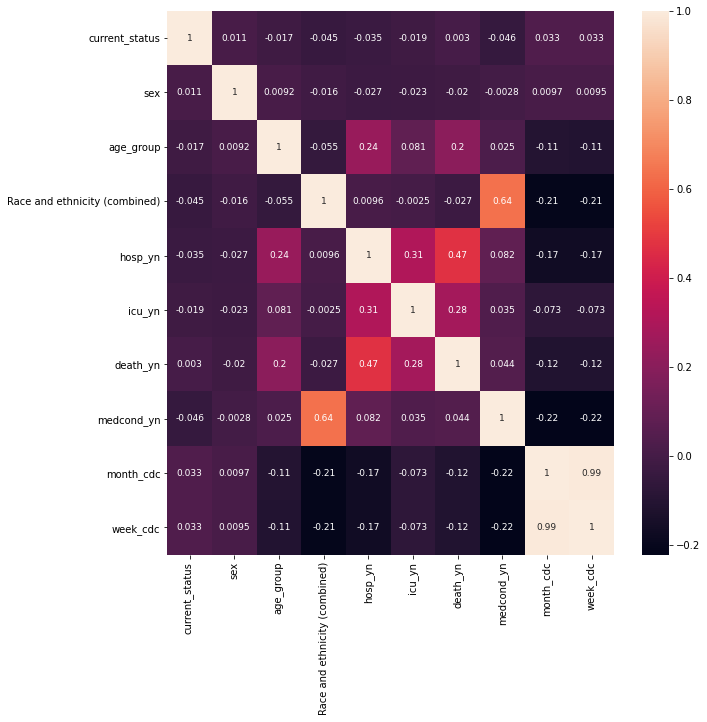

In [100]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':9})

# Implementing machine learning algorthm

# Performing classification problem based on Death condition


In [101]:
X=df.drop(columns=['death_yn','month_cdc','week_cdc','Race and ethnicity (combined)','age_group','pos_spec_dt','onset_dt','cdc_report_dt'])

In [102]:
y=df['death_yn']


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  


In [104]:
from sklearn.model_selection import train_test_split

In [105]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [106]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [107]:
#Logistic Regression
logistic_reg = LogisticRegression()
pred=logistic_reg.fit(X_train, y_train)
#Predicting values
Y_pred = logistic_reg.predict(X_test)

In [108]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   2710716
           1       0.51      0.16      0.24     62961

    accuracy                           0.98   2773677
   macro avg       0.75      0.58      0.61   2773677
weighted avg       0.97      0.98      0.97   2773677



In [109]:
confusion_matrix(y_test,Y_pred)

array([[2701376,    9340],
       [  53051,    9910]])

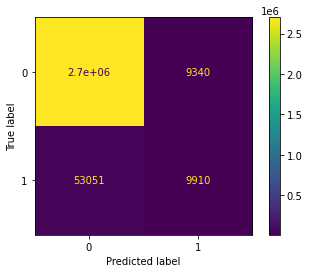

In [110]:
plot_confusion_matrix(logistic_reg, X_test, y_test)  

In [111]:
#RandomForest

rf_c=RandomForestClassifier()
pred_rf=rf_c.fit(X_train, y_train)
#Predicting values
Y_pred_rf = pred_rf.predict(X_test)

In [112]:
print(classification_report(y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   2710716
           1       0.56      0.19      0.28     62961

    accuracy                           0.98   2773677
   macro avg       0.77      0.59      0.64   2773677
weighted avg       0.97      0.98      0.97   2773677



In [113]:
confusion_matrix(y_test,Y_pred_rf)

array([[2701243,    9473],
       [  50924,   12037]])

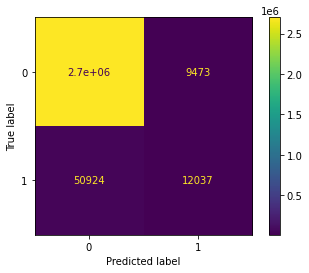

In [114]:
plot_confusion_matrix(rf_c, X_test, y_test)  

In [115]:
#Naive Bayes
Nb=GaussianNB()
pred_nb=Nb.fit(X_train, y_train)
#Predicting values
Y_pred_nb = pred_nb.predict(X_test)

In [116]:
print(classification_report(y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   2710716
           1       0.28      0.85      0.42     62961

    accuracy                           0.95   2773677
   macro avg       0.64      0.90      0.70   2773677
weighted avg       0.98      0.95      0.96   2773677



In [117]:
confusion_matrix(y_test,Y_pred_nb)

array([[2572621,  138095],
       [   9179,   53782]])

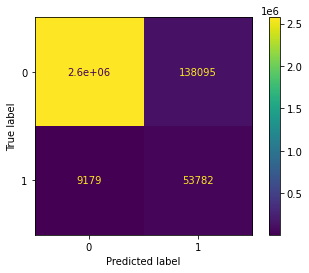

In [118]:
plot_confusion_matrix(Nb, X_test, y_test)

In [119]:
#Decision tree classifier
DC= DecisionTreeClassifier()  
pred_dc=DC.fit(X_train, y_train)

In [120]:
Y_pred_dc= pred_dc.predict(X_test)

In [121]:
print(classification_report(y_test, Y_pred_dc))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99   2710716
           1       0.56      0.19      0.28     62961

    accuracy                           0.98   2773677
   macro avg       0.77      0.59      0.64   2773677
weighted avg       0.97      0.98      0.97   2773677



In [122]:
confusion_matrix(y_test,Y_pred_dc)

array([[2701243,    9473],
       [  50924,   12037]])

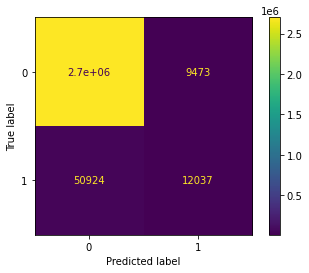

In [123]:
plot_confusion_matrix(DC, X_test, y_test)

# Performing classification problem based on joined in icu 

In [124]:
X=df.drop(columns=['death_yn','month_cdc','week_cdc','Race and ethnicity (combined)','age_group','pos_spec_dt','onset_dt','cdc_report_dt','current_status','icu_yn'])

In [125]:
y=df['icu_yn']

In [126]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [127]:
#Logistic Regression
logistic_reg = LogisticRegression()
pred=logistic_reg.fit(X_train, y_train)
#Predicting values
Y_pred = logistic_reg.predict(X_test)

In [128]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   2753605
           1       0.00      0.00      0.00     20072

    accuracy                           0.99   2773677
   macro avg       0.50      0.50      0.50   2773677
weighted avg       0.99      0.99      0.99   2773677



In [129]:
confusion_matrix(y_test,Y_pred)

array([[2753605,       0],
       [  20072,       0]])

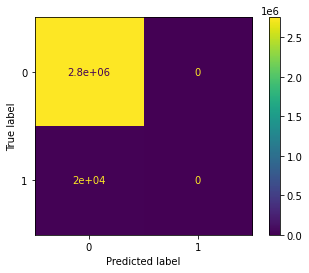

In [130]:
plot_confusion_matrix(logistic_reg, X_test, y_test)

In [131]:
#RandomForest

rf_c=RandomForestClassifier()
pred_rf=rf_c.fit(X_train, y_train)
#Predicting values
Y_pred_rf = pred_rf.predict(X_test)

In [132]:
print(classification_report(y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   2753605
           1       0.00      0.00      0.00     20072

    accuracy                           0.99   2773677
   macro avg       0.50      0.50      0.50   2773677
weighted avg       0.99      0.99      0.99   2773677



In [133]:
confusion_matrix(y_test,Y_pred_rf)

array([[2753605,       0],
       [  20072,       0]])

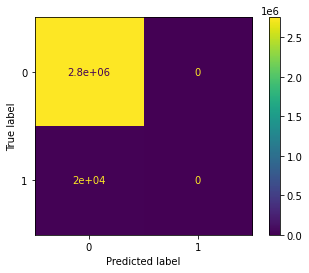

In [134]:
plot_confusion_matrix(rf_c, X_test, y_test)  

In [135]:
#Naive Bayes
Nb=GaussianNB()
pred_nb=Nb.fit(X_train, y_train)
#Predicting values
Y_pred_nb = pred_nb.predict(X_test)

In [136]:
print(classification_report(y_test, Y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   2753605
           1       0.10      0.99      0.19     20072

    accuracy                           0.94   2773677
   macro avg       0.55      0.96      0.58   2773677
weighted avg       0.99      0.94      0.96   2773677



In [137]:
confusion_matrix(y_test,Y_pred_nb)

array([[2581800,  171805],
       [    268,   19804]])

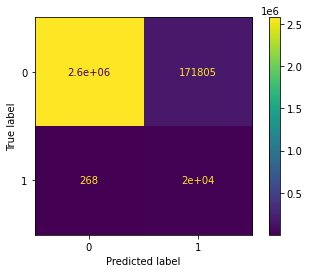

In [138]:
plot_confusion_matrix(Nb, X_test, y_test)

In [139]:
#Decision tree classifier
DC= DecisionTreeClassifier()  
pred_dc=DC.fit(X_train, y_train)

In [140]:
Y_pred_dc= pred_dc.predict(X_test)

In [141]:
print(classification_report(y_test, Y_pred_dc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   2753605
           1       0.00      0.00      0.00     20072

    accuracy                           0.99   2773677
   macro avg       0.50      0.50      0.50   2773677
weighted avg       0.99      0.99      0.99   2773677



In [142]:
confusion_matrix(y_test,Y_pred_dc)

array([[2753605,       0],
       [  20072,       0]])

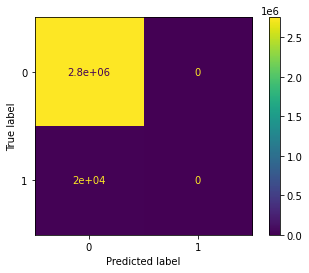

In [143]:
plot_confusion_matrix(DC, X_test, y_test)